In [2]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4+ 3 * X + np.random.randn(100,1)

In [3]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.07035949],
       [2.85032013]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #Add 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07035949],
       [9.77099974]])

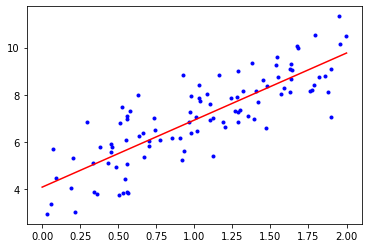

In [5]:
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.plot(X_new, y_predict,"r-")

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07035949]), array([[2.85032013]]))

In [7]:
lin_reg.predict(X_new)

array([[4.07035949],
       [9.77099974]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.07035949],
       [2.85032013]])

In [9]:
residuals

array([101.81269245])

In [10]:
rank

2

In [11]:
s

array([14.92433776,  3.5502468 ])

**Gradient Descent**

*Batch GD*

In [12]:
eta = .1 # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.07035949],
       [2.85032013]])

*Stochastic GD*

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
theta

array([[4.09524381],
       [2.81359701]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.12170498]), array([3.00216986]))

In [20]:
!("4_1.png")

**Polynomial Regression**

In [21]:
m = 100 #problem definition
X = 6 * np.random.randn(m,1) -3
y = .5 * X**2 + X + 2 + np.random.randn(m,1)


In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-14.03777019])

In [23]:
X_poly[0]



array([-14.03777019, 197.05899187])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96536762]), array([[1.01392071, 0.50118325]]))

**Learning Curves**

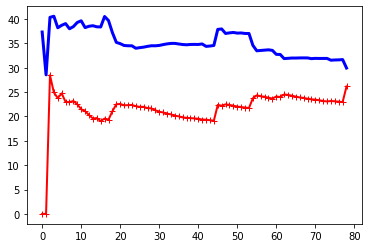

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

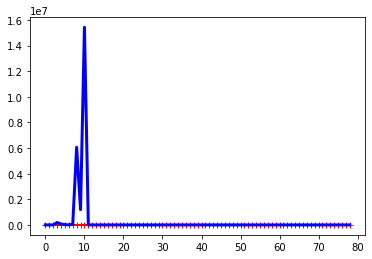

In [32]:
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_reg, X, y)

**Regularized Linear Models**

*Ridge Regression*